
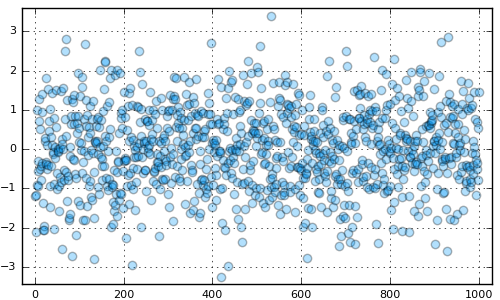

In [95]:
using Plots
pyplot(size=(500,300))

# this is called from within a recipe. it computes edges and counts for our histogram.
function myhist!(d::KW)
    # There is a fully populated attribute dictionary `d` available.
    # `bin_ends` is not a Plots attribute... I just made it up.
    #   (note: make sure you remove it from the dictionary with `pop!` or `delete!`)
    bin_ends = pop!(d, :bin_ends, nothing)
    xmin, xmax = if bin_ends == nothing
        extrema(d[:y])
    else
        bin_ends
    end
    
    # `bins` is a Plots attribute, and will get the default value,
    # but you can still change it.
    edges = linspace(xmin, xmax, d[:bins]+1)
    edges, counts = hist(d[:y], edges)
end

# This is a series recipe.
# Create your own series type to act on any valid inputs
@recipe function f(::Type{Val{:my_histogram}}, x, y, z)
    edges, counts = myhist!(d)
    
    # if `bar_width` is still nothing (the default) we'll a reasonable value
    if d[:bar_width] == nothing
        bar_width := 0.8mean(diff(edges))
    end
    
    # The `:=` operator will force the attribute value.
    # `seriestype := :bar` is equivalent to `d[:seriestype] = :bar`.
    # Here we are creating a "bar series", where the inside of the bars
    # is 30% opaque, and the x/y vectors are the centers and tops of the histogram
    seriestype := :bar
    fillalpha := 0.3
    x := 0.5(edges[1:end-1] + edges[2:end])
    y := counts
    
    # This is a series recipe, and we return an empty arguments list to signal
    # that this recipe is finished.  Most series recipes will return an empty tuple.
    ()
end

# this is what our data looks like
y = randn(1000)
scatter(y, α=0.3)


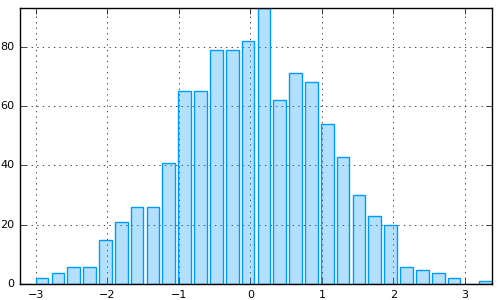

In [96]:
# our custom histogram!
plot(y, t=:my_histogram)


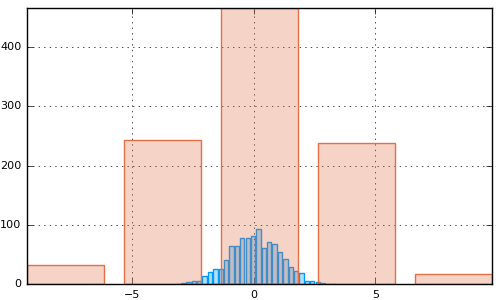

In [97]:
# the @shorthands macro will create convenience methods for us
@shorthands my_histogram

# now we can call it like this:
my_histogram(y)
my_histogram!(3y, bins=5)


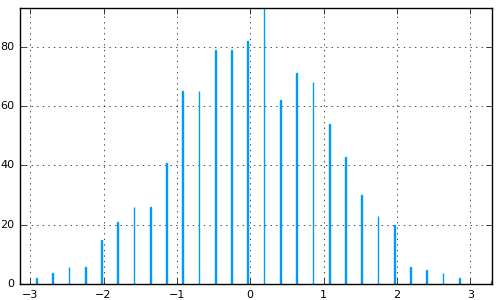

In [98]:
# I gave myself a hook to set the `bar_width` myself
my_histogram(y, bar_width=0.01)


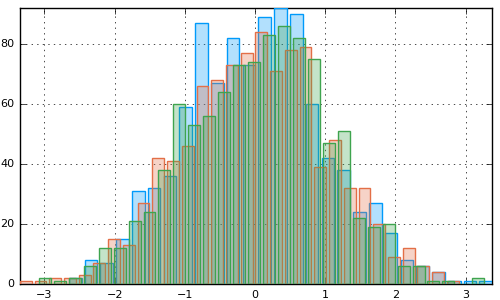

In [99]:
# one simple recipe will work on many different input combinations
my_histogram(randn(1000,3))


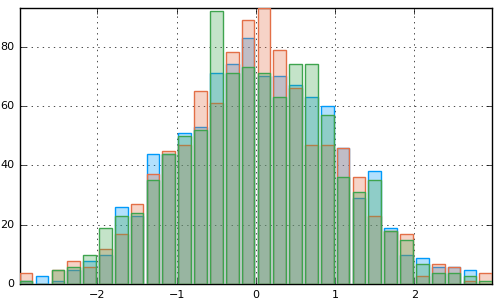

In [100]:
# I wish they lined up nicely, so I allow the custom keyword `bin_ends`
my_histogram(randn(1000,3), bin_ends=(-3,3))


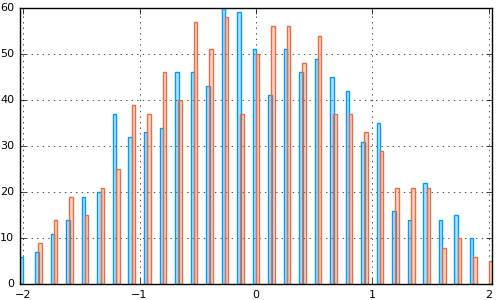

In [101]:
# and you could quickly get creative
with(bar_width=0.03) do
    my_histogram(randn(1000), bin_ends=(-2.08,1.92))
    my_histogram!(randn(1000), bin_ends=(-1.92,2.08))
end


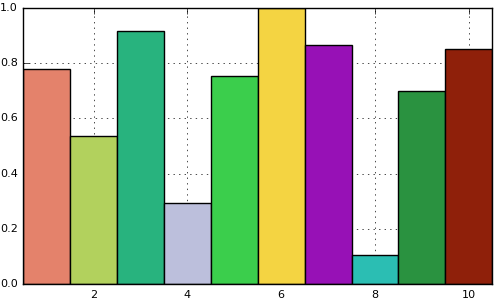

In [102]:
# random colors?
Base.rand(::Type{RGB}, n) = [RGB(rand(),rand(),rand()) for i=1:n]

# also... I'm sick of the legend
default(leg=false)

# why would anyone do this?
@recipe function f(::Type{Val{:funky_bar}}, x, y, z)
    seriestype := :bar
    linecolor := :black
    fillcolor := rand(RGB, length(x))
    ()
end

# who cares? it's funkadelic!
plot(rand(10), t=:funky_bar)


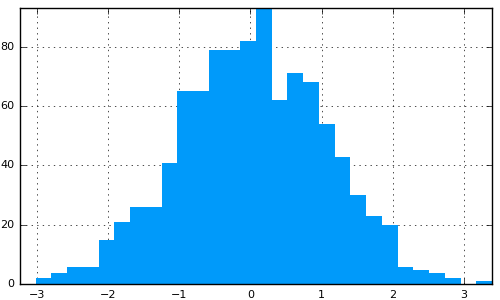

In [103]:
# Lets redefine a histogram, and give our user the option of funk!
# See how you can modularize transformations by first making a custom
# bar plot, and then making a custom histogram which can call it.
@recipe function f(::Type{Val{:funky_histogram}}, x, y, z)
    edges, counts = myhist!(d)
    seriestype := (pop!(d, :funky, false) ? :funky_bar : :bar)
    linewidth := 0
    x := 0.5(edges[1:end-1] + edges[2:end])
    y := counts
    ()
end
@shorthands funky_histogram

# booooooorrrriiiiiiing
funky_histogram(y)


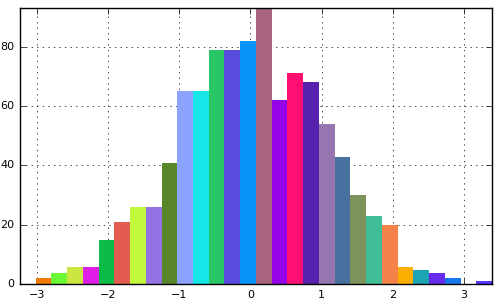

In [104]:
# that's more like it!
funky_histogram(y, funky=true)